# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
# file contains some invalid chars

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from wordcloud import WordCloud

In [100]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [101]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [102]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [103]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [104]:
df.columns = ['labels', 'data']

In [105]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

# Calculate features using CountVectorizer

In [106]:
# Method 1 to calculating features
count_vectorizer = CountVectorizer(decode_error='ignore')
X_count = count_vectorizer.fit_transform(df['data'])

# Calculate features using TfidfVectorizer

In [107]:
# Method2 to calculating features
tfidf = TfidfVectorizer(decode_error='ignore')
X_tfidf = tfidf.fit_transform(df['data'])

In [108]:
X = X_count
# X = X_tfidf

In [109]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

# Train data using Multinomial Naive Bayes 

In [110]:
# model 1 using Multinomial Naive Bayes
model1 = MultinomialNB()
model1.fit(Xtrain, Ytrain)
print("train score:", model1.score(Xtrain, Ytrain))
print("test score:", model1.score(Xtest, Ytest))

train score: 0.9924993302973479
test score: 0.9864056552474171


# Train data using AdaBoost Classifier 

In [111]:
# model 2 using AdaBoost
model2 = AdaBoostClassifier()
model2.fit(Xtrain, Ytrain)
print("train score:", model2.score(Xtrain, Ytrain))
print("test score:", model2.score(Xtest, Ytest))

train score: 0.9817840878649879
test score: 0.9749864056552474


# Train data using C-Support Vector Classifier

In [112]:
model3 = SVC(gamma = 'auto')
model3.fit(Xtrain, Ytrain )
print("train score:", model3.score(Xtrain, Ytrain))
print("test score:", model3.score(Xtest, Ytest))

train score: 0.8657915885346906
test score: 0.866231647634584


WordCloud of spam


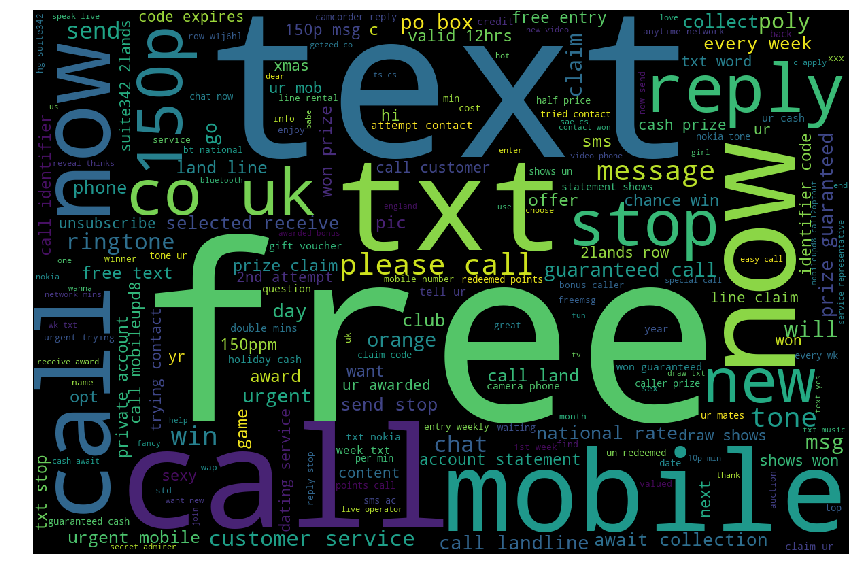

**************************************************
WordCloud of ham


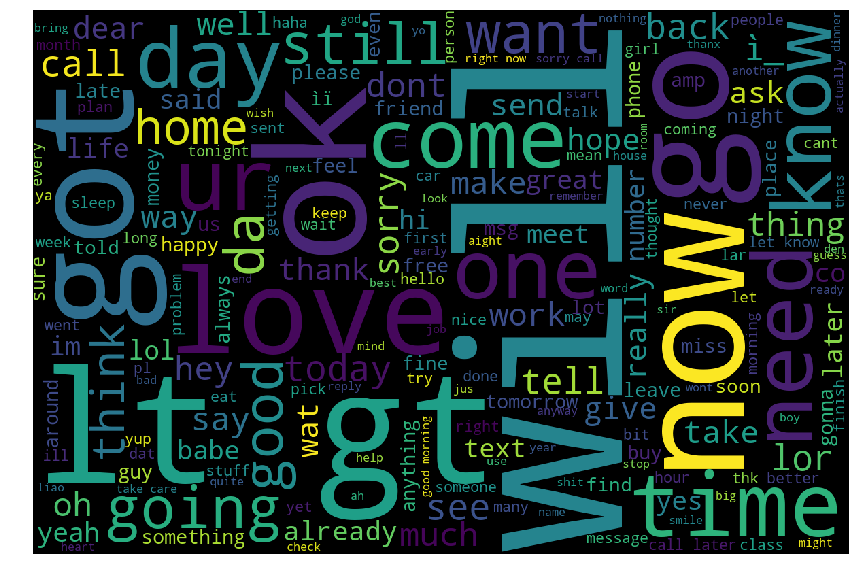

In [113]:
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=1200, height=800).generate(words)
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

print('WordCloud of spam')
visualize('spam')
print('*'*50)
print('WordCloud of ham')
visualize('ham')

In [117]:
# see what we're getting wrong
df['predictions'] = model1.predict(X)

In [118]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin ove

In [119]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Host-based IDPS for linux systems.
Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........
\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\""
Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens
Also andros ice etc etc
Cps is causing the outages to conserve energy.
Unlimited texts. Limited minutes.
Playin space poker, u?
\GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI\""
Mathews or tait or edwards or anderson
Urgh, coach hot, smells of chip fat! Thanks again, especially for the duvet (not a predictive text word).
Gettin rdy to ship comp
Have you laid your airtel line to rest?
Received, understood n acted upon!
Wewa is 130. Iriver 

In [120]:
Ypredict1 = model1.predict(Xtest)
Ypredict2 = model2.predict(Xtest)
Ypredict3 = model3.predict(Xtest)

In [121]:
print('Classification Report of MultinomialNB:\n ', classification_report(Ypredict1, Ytest))
print('Confusion Matrix of MultinomialNB:\n ', confusion_matrix(Ypredict1, Ytest))
print('*'*50)

print('Classification Report of AdaBoostClassifier:\n ', classification_report(Ypredict2, Ytest))
print('Confusion Matrix of AdaBoostClassifier:\n ', confusion_matrix(Ypredict2, Ytest))

Classification Report of MultinomialNB:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1588
           1       0.96      0.94      0.95       251

   micro avg       0.99      0.99      0.99      1839
   macro avg       0.97      0.97      0.97      1839
weighted avg       0.99      0.99      0.99      1839

Confusion Matrix of MultinomialNB:
  [[1578   10]
 [  15  236]]
**************************************************
Classification Report of AdaBoostClassifier:
                precision    recall  f1-score   support

           0       0.99      0.98      0.99      1615
           1       0.86      0.95      0.90       224

   micro avg       0.97      0.97      0.97      1839
   macro avg       0.93      0.96      0.94      1839
weighted avg       0.98      0.97      0.98      1839

Confusion Matrix of AdaBoostClassifier:
  [[1581   34]
 [  12  212]]
